<a href="https://colab.research.google.com/github/coffema/coffema/blob/main/Copy_of_aya_altehaan_Week_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 06:


In This Week's assignment,we will use machine learning models to predict if it will rain tomorrow.


Before starting copy this file and work on your own copy by following the below steps:

<br>

`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 06: - Muntahder Al-kaabi).

<br>

Requirements:
1. Download the data.
1. Import all necessary libraries.
2. Read the dataset.
3. Define a function to split the data.
3. Drop the unnecessary column.
3. Describe the dataset.
3. Show the dataset info.
5. Get the number of missing values.
3. Plot the target column.
3. Balance the dataset.
3. Plot the target column.
4. Write a tokenizer function.
5. Tokenize the target column.
4. Fill the missing values.
3. Split the data to feature and target.
3. Normalize the features.
3. Get the best number of columns.
3. Modeling
13. GridSerach for the Best Model.
3. Add PAC to the best Model.




Good luck and feel free to ask any question.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/cancer.csv'

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Print the contents of the CSV file
print(data.head())

NameError: ignored

# Import data

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d jsphyg/weather-dataset-rattle-package

100% 3.83M/3.83M [00:00<00:00, 5.64MB/s]
100% 3.83M/3.83M [00:00<00:00, 4.12MB/s]


In [ ]:
!unzip /content/weather-dataset-rattle-package.zip

Archive:  /content/weather-dataset-rattle-package.zip
  inflating: weatherAUS.csv          


# Importing the necessary libraries 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import cluster, datasets, metrics,impute, model_selection, feature_selection, svm, pipeline, preprocessing, decomposition
import seaborn as se
from tqdm import tqdm 
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Read the Dataset

In [ ]:
# Read the data using pandas 
data=pd.read_csv('/content/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Define a function to split the data to train and test for cross validation

In [ ]:
# Define a function to split our dataset into train/test splits using indices
def train_test_split(x, y, train_indices, test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

# Drop the unnecessary column.

In [ ]:
# Drop the following columns 
# ['Location','Date']
data.drop(columns=['Location','Date'],inplace=True,axis=1)
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Describe the dataset.

In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Show the dataset info.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   Evaporation    82670 non-null   float64
 4   Sunshine       75625 non-null   float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Cloud9am       89572 non-null   float64
 16  Cloud3pm       86102 non-null   float64
 17  Temp9am        143693 non-nul

# Get the number of missing values.

In [ ]:
data.isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Plot the target column.

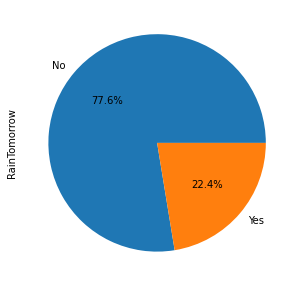

In [ ]:
data.RainTomorrow.value_counts().plot.pie(figsize = (5,5),
                                        autopct = '%1.1f%%')

expected output

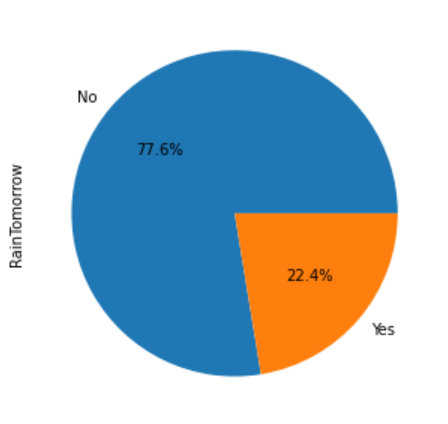

# Balance the dataset.

In [ ]:
# create new dataset the balance 
new_dataset=data[data.RainTomorrow=='Yes'].sample(n=3000,random_state=42)
new_dataset=new_dataset.append(data[data.RainTomorrow=='No'].sample(n=3000,random_state=42))

# Reset indexes
new_dataset.reset_index(inplace=True,drop=True)

# Plot the target column after balancing.

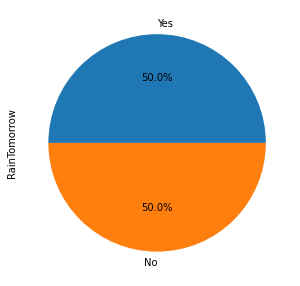

In [ ]:
new_dataset.RainTomorrow.value_counts().plot.pie(figsize = (5,5),
                                        autopct = '%1.1f%%')

# Write a tokenizer function.

In [ ]:
def tokenizer(col):
    word_id={}
    id_word = {}
    for id,word in enumerate(col.unique()):
        word_id[word]=id 
        id_word[id] = word
    return word_id,id_word

# Tokenize the columns.

In [ ]:
# Get the label to id and id to label dictionary 
RainTomorrow_id,id_RainTomorrow = tokenizer(new_dataset.RainTomorrow)
new_dataset.RainTomorrow.replace(RainTomorrow_id,inplace=True)

RainToday_id,id_RainToday = tokenizer(new_dataset.RainToday)
new_dataset.RainToday.replace(RainToday_id,inplace=True)


WindDir3pm_id,id_WindDir3pm= tokenizer(new_dataset.WindDir3pm)
new_dataset.WindDir3pm.replace(WindDir3pm_id,inplace=True)

WindDir9am_id,id_WindDir9am = tokenizer(new_dataset.WindDir9am)
new_dataset.WindDir9am.replace(WindDir9am_id,inplace=True)


WindGustDir_id,id_WindGustDir = tokenizer(new_dataset.WindGustDir)
new_dataset.WindGustDir.replace(WindGustDir_id,inplace=True)


In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        5968 non-null   float64
 1   MaxTemp        5988 non-null   float64
 2   Rainfall       5911 non-null   float64
 3   Evaporation    3397 non-null   float64
 4   Sunshine       3141 non-null   float64
 5   WindGustDir    6000 non-null   int64  
 6   WindGustSpeed  5566 non-null   float64
 7   WindDir9am     6000 non-null   int64  
 8   WindDir3pm     6000 non-null   int64  
 9   WindSpeed9am   5932 non-null   float64
 10  WindSpeed3pm   5889 non-null   float64
 11  Humidity9am    5918 non-null   float64
 12  Humidity3pm    5843 non-null   float64
 13  Pressure9am    5412 non-null   float64
 14  Pressure3pm    5415 non-null   float64
 15  Cloud9am       3799 non-null   float64
 16  Cloud3pm       3706 non-null   float64
 17  Temp9am        5950 non-null   float64
 18  Temp3pm 

In [ ]:
def conv_type(x):
  new_dataset[x]=new_dataset[x].astype('float')
  return new_dataset[x]


In [ ]:
conv_type('RainTomorrow')
conv_type('RainToday')
conv_type('WindDir3pm')
conv_type('WindDir9am')
conv_type('WindGustDir')

0        0.0
1        1.0
2        2.0
3        3.0
4        4.0
        ... 
5995     9.0
5996     3.0
5997    11.0
5998     6.0
5999     8.0
Name: WindGustDir, Length: 6000, dtype: float64

In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        5968 non-null   float64
 1   MaxTemp        5988 non-null   float64
 2   Rainfall       5911 non-null   float64
 3   Evaporation    3397 non-null   float64
 4   Sunshine       3141 non-null   float64
 5   WindGustDir    6000 non-null   float64
 6   WindGustSpeed  5566 non-null   float64
 7   WindDir9am     6000 non-null   float64
 8   WindDir3pm     6000 non-null   float64
 9   WindSpeed9am   5932 non-null   float64
 10  WindSpeed3pm   5889 non-null   float64
 11  Humidity9am    5918 non-null   float64
 12  Humidity3pm    5843 non-null   float64
 13  Pressure9am    5412 non-null   float64
 14  Pressure3pm    5415 non-null   float64
 15  Cloud9am       3799 non-null   float64
 16  Cloud3pm       3706 non-null   float64
 17  Temp9am        5950 non-null   float64
 18  Temp3pm 

# Fill the missing values.

In [ ]:
# initialize the KNNImputer
imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
# Fit impute on the dataset 
imp.fit(new_dataset)
# Imputation of missing values
data_imp = imp.transform(new_dataset)

In [ ]:
# Create DataFrame from new_dataset_imp
new_dataset_imp = pd.DataFrame(data_imp,columns=new_dataset.columns)
new_dataset_imp

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.2,26.0,0.6,5.133971,6.53623,0.0,44.0,0.0,0.0,11.0,...,85.0,64.0,1016.554231,1014.287535,5.020268,5.12925,18.8,25.0,0.0,0.0
1,9.5,16.6,0.6,1.200000,0.10000,1.0,41.0,1.0,1.0,11.0,...,89.0,86.0,1009.100000,1004.700000,7.000000,8.00000,12.8,15.9,0.0,0.0
2,17.0,23.4,0.0,5.133971,6.53623,2.0,50.0,2.0,2.0,17.0,...,86.0,82.0,1015.700000,1010.900000,5.020268,5.12925,20.2,22.2,0.0,0.0
3,11.3,14.9,9.6,5.133971,6.53623,3.0,35.0,3.0,3.0,9.0,...,99.0,98.0,1007.000000,1003.000000,7.000000,8.00000,12.0,14.0,1.0,0.0
4,16.1,19.9,11.4,14.600000,3.60000,4.0,41.0,4.0,4.0,22.0,...,83.0,79.0,1019.900000,1019.600000,8.000000,8.00000,17.7,18.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,20.4,29.0,0.0,7.800000,7.70000,9.0,30.0,3.0,4.0,11.0,...,65.0,54.0,1014.100000,1012.100000,7.000000,7.00000,25.8,27.7,0.0,1.0
5996,18.6,25.9,0.0,6.000000,1.20000,3.0,31.0,9.0,12.0,0.0,...,91.0,80.0,1019.100000,1020.100000,7.000000,8.00000,19.6,22.9,0.0,1.0
5997,18.4,37.6,0.0,5.133971,6.53623,11.0,37.0,15.0,14.0,26.0,...,11.0,6.0,1011.300000,1006.900000,5.020268,5.12925,28.1,36.1,0.0,1.0
5998,16.5,22.1,0.0,6.200000,11.90000,6.0,30.0,6.0,4.0,9.0,...,54.0,56.0,1019.400000,1019.500000,4.000000,5.00000,20.6,21.8,0.0,1.0


# Split the data to feature and target.


In [ ]:
# split the dataset to x,y 
x=new_dataset_imp.drop(columns=['RainTomorrow'])
y=new_dataset_imp.RainTomorrow.to_numpy()

# Normalize the features.


In [ ]:
# Normalize the features using Standard Scaler
normalizer = preprocessing.StandardScaler()
x_norm = normalizer.fit_transform(x)

# Get Best Number Features to Select

In [ ]:
# Define the cross validation method
kfold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 
# Define empty dictionary for records
d={}
# k equal to number Features to Select
best_k = {
    'k':[],
    'f1_score':[],
    'recall_score':[],
    'precision_score':[]
}

for k in tqdm(range(len(x.columns))):
    f1_score = []
    recall_score = []
    precision_score = []
    k +=1

    # Create a linear model
    lsvc = svm.SVC(kernel='linear',max_iter=-1)
    # Define the feature selection method
    feature_selector = feature_selection.RFE(lsvc,n_features_to_select=k)
    # fit the feature Selection method on the x_norm and y
    feature_selector.fit(x_norm,y)
    # get the new fetures 
    new_x = feature_selector.transform(x_norm)   
    

    # Evaluate model on the features for defiant k to 20
    for train_indexes,test_indexes in kfold.split(new_x,y):
        
        x_train,x_test,y_train,y_test = train_test_split(new_x,y,train_indexes,test_indexes,)

        model = svm.SVC()
        model.fit(x_train,y_train)
        pred = model.predict(x_test) 


        f1_score.append(metrics.f1_score(y_test,pred))
        recall_score.append(metrics.recall_score(y_test,pred))
        precision_score.append( metrics.precision_score(y_test,pred))



        best_k['k'].append(k)
        best_k['f1_score'].append( np.mean(f1_score))
        best_k['recall_score'].append(np.mean( recall_score))
        best_k['precision_score'].append( np.mean(precision_score))

100%|██████████| 20/20 [11:04<00:00, 33.21s/it]


In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame(best_k)
scores_df

,k,f1_score,recall_score,precision_score
0,1,0.733333,0.806667,0.672222
1,1,0.743249,0.800000,0.694545
2,1,0.735665,0.791111,0.687836
3,1,0.735878,0.792500,0.687081
4,1,0.743110,0.803333,0.691564
...,...,...,...,...
195,20,0.786259,0.793333,0.779716
196,20,0.787117,0.797143,0.777807
197,20,0.786371,0.794167,0.779221
198,20,0.782104,0.791111,0.773770


# Feature selection

In [ ]:
# Create the linear model
lsvc = svm.SVC(kernel='linear',max_iter=-1)
# Define the feature selection method
feature_selector = feature_selection.RFE(lsvc,n_features_to_select=k)
# fit the feature Selection method on the x_norm and y
feature_selector.fit(x_norm,y)
# get the new fetures 

new_x = feature_selector.transform(x_norm)

new_x

array([[ 0.75933111,  0.518505  , -0.30095311, ...,  0.31703449,
         0.63285217, -0.67661561],
       [-0.46563433, -0.82206102, -0.30095311, ..., -0.63438078,
        -0.71386176, -0.67661561],
       [ 0.72751382,  0.14771014, -0.35843356, ...,  0.53903138,
         0.21847865, -0.67661561],
       ...,
       [ 0.95023481,  2.17282052, -0.35843356, ...,  1.79172816,
         2.27554717, -0.67661561],
       [ 0.64797061, -0.03768728, -0.35843356, ...,  0.60245907,
         0.15928244, -0.67661561],
       [-0.95880223, -0.75075432,  0.12057022, ..., -0.85637768,
        -1.02464189,  1.30565669]])

# Modeling

In [ ]:
# splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42

stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42)
# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in tqdm(stratified_shuffled_k_fold.split(new_x, y)): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        new_x, y, train_indices, test_indices
    )

    # Train model

    svc = svm.SVC()
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)
    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred,average='weighted'))
    recall.append( metrics.recall_score(y_test, y_pred,average='weighted'))
    f1_score.append(metrics.f1_score(y_test, y_pred,average='weighted'))

10it [00:14,  1.47s/it]


In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.790000,0.790323,0.790000,0.789942
1,0.786667,0.786781,0.786667,0.786645
2,0.773333,0.773382,0.773333,0.773323
3,0.795000,0.795555,0.795000,0.794904
4,0.778333,0.779704,0.778333,0.778061
5,0.783333,0.783346,0.783333,0.783331
6,0.785000,0.786403,0.785000,0.784736
7,0.783333,0.783447,0.783333,0.783312
8,0.741667,0.742272,0.741667,0.741505
9,0.778333,0.780280,0.778333,0.777948


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.779500
precision    0.780149
recall       0.779500
F1           0.779371
dtype: float64

# GridSerach for the Best Model

In [ ]:
pipe = Pipeline([("classifier", RandomForestClassifier())])
search_space = [{"classifier": [LogisticRegression()],
                               "classifier__penalty": ["l1", "l2"],
                               "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [RandomForestClassifier()],
                               "classifier__n_estimators": [10, 100, 1000],
                               "classifier__max_features": [1, 2, 3]
                }]

In [ ]:

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, n_jobs = -1)

best_model = clf.fit(x, y)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 145.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", l

In [ ]:
print(best_model.best_estimator_.get_params()["classifier"])

RandomForestClassifier(max_features=3, n_estimators=1000)


# Add PAC to the best Model 

In [ ]:
pca = decomposition.PCA(n_components=20)
pca.fit(x_norm)

new_x = pca.transform(x_norm)
new_dataset5 = pd.DataFrame(new_x,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17','PCA18','PCA19','PCA20'])
new_dataset5

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20
0,0.684768,-0.105765,-1.297394,-1.443603,0.371724,-2.350580,-0.641629,-0.014327,0.157416,0.302312,-0.033547,0.461801,-0.106192,0.044483,0.898890,-0.207988,-0.148044,-0.118103,0.034850,-0.141301
1,-2.385331,1.592584,-1.234283,-0.762311,-1.583730,-2.970743,-0.939811,-0.264211,0.033155,-0.554286,-0.483093,0.550351,-0.077246,0.577867,0.048890,0.208813,0.216965,0.006327,0.220773,-0.052418
2,0.436017,1.237740,0.231197,-1.656616,0.279171,-1.889284,-0.468717,-0.117124,-0.537184,1.400827,0.420921,0.783449,0.311940,0.137782,-0.267151,0.240974,0.181825,-0.005059,0.273551,0.042265
3,-2.505755,1.865602,-1.709270,1.016232,0.391511,-2.435821,-0.725588,-0.156342,1.171941,0.300964,-0.542797,-0.583875,0.020975,-1.014686,0.310255,-0.202434,0.100261,-0.131190,0.286478,0.023751
4,-0.998440,1.617084,-1.298196,-2.073133,0.999623,0.129019,0.710673,0.018026,2.910770,0.671576,-0.273545,-0.848128,-0.119120,-0.001560,0.302630,0.231515,-0.039767,0.057265,-0.028957,-0.052680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2.056738,0.531853,-1.777197,-1.012933,-0.663033,-0.281111,-0.547333,-0.693116,0.559082,0.332274,0.320095,-0.025834,0.095469,-0.923882,-0.426436,0.068861,-0.190615,0.215628,0.017079,-0.030300
5996,-0.780078,0.224653,-3.143991,-0.857744,-1.212602,-0.089932,1.357950,0.670793,-0.035149,0.651359,0.115190,0.465753,0.605117,0.859555,0.056547,0.045018,-0.195966,-0.164681,-0.275810,-0.245867
5997,4.849762,0.372235,0.330983,0.305330,-1.859061,1.720787,0.879886,0.621202,-0.669882,-2.206643,-0.514837,-0.678728,-0.617302,-0.397541,-0.779740,0.405695,0.327606,-0.084636,0.105482,-0.016717
5998,1.346642,-1.475696,-0.134795,-0.719297,0.444462,-0.516672,-0.373666,0.095307,0.143792,0.758005,-0.057214,-0.015808,0.536083,-1.232248,-1.004029,-0.545474,-0.475460,0.027732,0.051497,-0.223253


In [ ]:

# Define the cross validation method


kmean = cluster.KMeans(n_clusters=20)
kmean.fit(new_dataset5)
clusters = kmean.labels_

    # Evaluate svm on the features for defiant k values form 1 to 20


In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.790000,0.790323,0.790000,0.789942
1,0.786667,0.786781,0.786667,0.786645
2,0.773333,0.773382,0.773333,0.773323
3,0.795000,0.795555,0.795000,0.794904
4,0.778333,0.779704,0.778333,0.778061
5,0.783333,0.783346,0.783333,0.783331
6,0.785000,0.786403,0.785000,0.784736
7,0.783333,0.783447,0.783333,0.783312
8,0.741667,0.742272,0.741667,0.741505
9,0.778333,0.780280,0.778333,0.777948


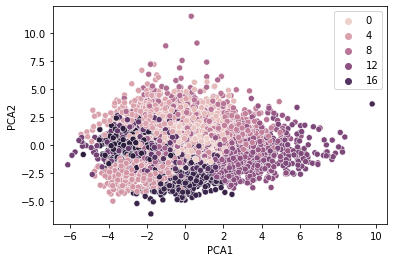

In [ ]:
sns.scatterplot(data=new_dataset5,x='PCA1',y='PCA2',hue= clusters)

In [ ]:
# Create the Mini Batch KMeans cluster
silhouette_score_list = {}
for k in tqdm(range(3)):
    # Create the Mini Batch KMeans cluster
    kmeans = cluster.MiniBatchKMeans(n_clusters=k,random_state=42)
    # Fit the kmeans cluster on the features
    kmeans.fit(new_dataset5)
    # Add the k as key and silhouette_score as value to the silhouette_score_list dictionary 
    silhouette_score_list[k]=metrics.silhouette_score(new_dataset5,kmeans.labels_)

  0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:191: RuntimeWarning: divide by zero encountered in log
  n_local_trials = 2 + int(np.log(n_clusters))
  0%|          | 0/3 [00:00<?, ?it/s]


OverflowError: ignored

In [ ]:
# Plot the silhouette_score_list dictionary 

plt.title('silhouette_score_list')
plt.plot(list(silhouette_score_list.keys()),list(silhouette_score_list.values()))
plt.xlabel('K')
plt.ylabel('silhouette_score')

In [ ]:
new_dataset5['clusters']=kmeans.labels_

KeyError: ignored

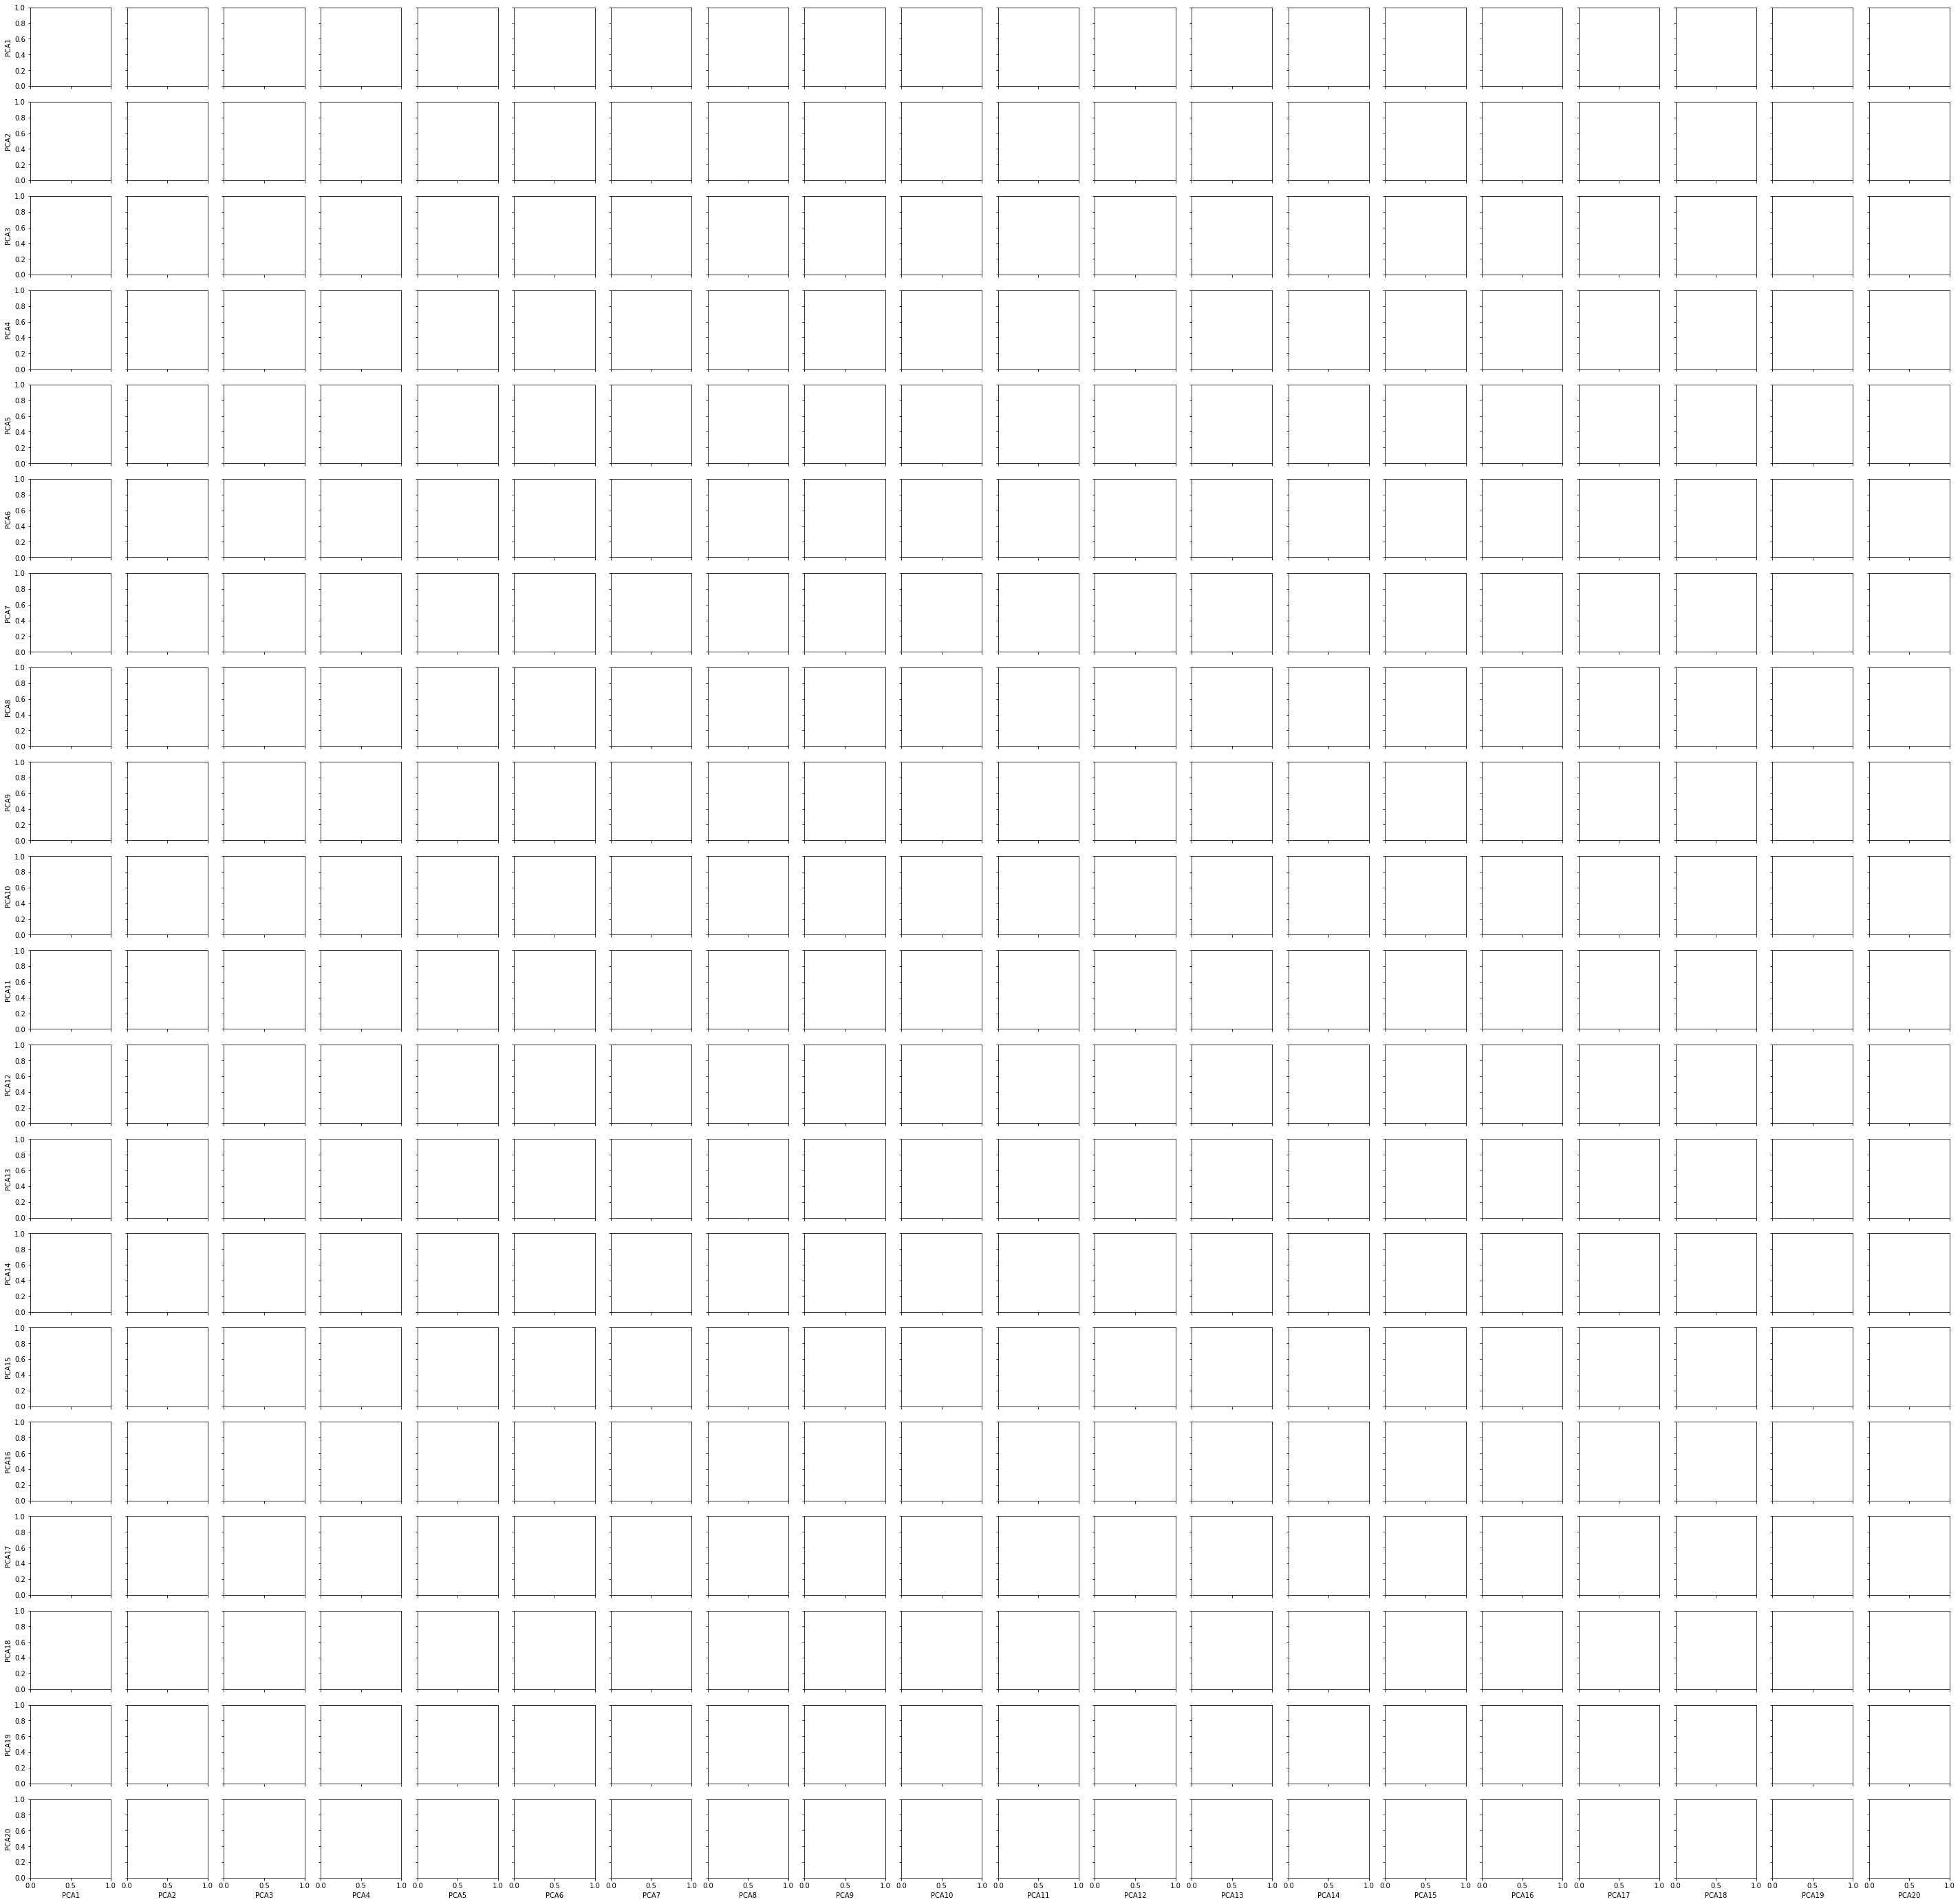

In [ ]:
sns.pairplot(data=new_dataset5,hue='clusters')

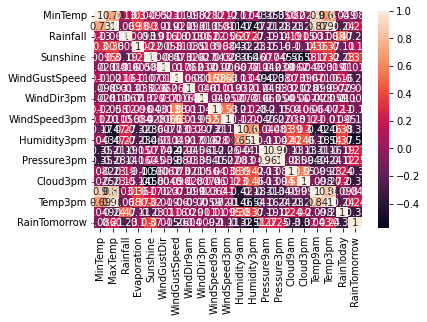

In [ ]:
sns.heatmap(new_dataset_imp.corr(),annot=True,)